
**Deliverable 1: Exploratory Data Analysis**



**Raw Data Exploration**

In [ ]:
# United Airlines — Deliverable 1: EDA

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print(" Libraries imported successfully.")

# ---- Load all CSV files ----
flight_df = pd.read_csv("Flight Level Data.csv")
bags_df = pd.read_csv("BagLevelData.csv")
pnr_flight_df = pd.read_csv("PNRFlightLevelData.csv")
pnr_remarks_df = pd.read_csv("PNR Remark Level Data.csv")
airports_df = pd.read_csv("Airports Data.csv")

print("\n All CSV files loaded successfully!\n")

# ===============================================================
# 1️ Inspect Flight Level Data
# ===============================================================
print("="*60)
print(" FLIGHT LEVEL DATA INSPECTION")
print("="*60)
print(f"Shape: {flight_df.shape}\n")
print("Column Info:")
print(flight_df.info())
print("\nMissing Values:")
print(flight_df.isnull().sum())
print("\nDescriptive Statistics:")
print(flight_df.describe(include='all').transpose())
print("\nFirst 3 Rows:")
print(flight_df.head(3))
print("\n" + "="*60 + "\n")

# ===============================================================
# 2️ Inspect Bag Level Data
# ===============================================================
print(" BAG LEVEL DATA INSPECTION")
print("="*60)
print(f"Shape: {bags_df.shape}\n")
print("Column Info:")
print(bags_df.info())
print("\nMissing Values:")
print(bags_df.isnull().sum())
print("\nFirst 3 Rows:")
print(bags_df.head(3))
print("\n" + "="*60 + "\n")

# ===============================================================
# 3 Inspect PNR Flight Level Data
# ===============================================================
print(" PNR FLIGHT LEVEL DATA INSPECTION")
print("="*60)
print(f"Shape: {pnr_flight_df.shape}\n")
print("Column Info:")
print(pnr_flight_df.info())
print("\nMissing Values:")
print(pnr_flight_df.isnull().sum())
print("\nDescriptive Statistics:")
print(pnr_flight_df.describe(include='all').transpose())
print("\nFirst 3 Rows:")
print(pnr_flight_df.head(3))
print("\n" + "="*60 + "\n")

# ===============================================================
#  Inspect PNR Remark Level Data
# ===============================================================
print(" PNR REMARK LEVEL DATA INSPECTION")
print("="*60)
print(f"Shape: {pnr_remarks_df.shape}\n")
print("Column Info:")
print(pnr_remarks_df.info())
print("\nMissing Values:")
print(pnr_remarks_df.isnull().sum())
print("\nFirst 3 Rows:")
print(pnr_remarks_df.head(3))
print("\n" + "="*60 + "\n")

# ===============================================================
# 5️ Inspect Airports Data
# ===============================================================
print("🛫 AIRPORTS DATA INSPECTION")
print("="*60)
print(f"Shape: {airports_df.shape}\n")
print("Column Info:")
print(airports_df.info())
print("\nMissing Values:")
print(airports_df.isnull().sum())
print("\nFirst 3 Rows:")
print(airports_df.head(3))
print("\n" + "="*60 + "\n")

# ===============================================================
# Summary of All Datasets
# ===============================================================
datasets_summary = pd.DataFrame({
    "Dataset": ["Flight Level", "Bag Level", "PNR Flight Level", "PNR Remark Level", "Airports"],
    "Rows": [len(flight_df), len(bags_df), len(pnr_flight_df), len(pnr_remarks_df), len(airports_df)],
    "Columns": [len(flight_df.columns), len(bags_df.columns), len(pnr_flight_df.columns),
                len(pnr_remarks_df.columns), len(airports_df.columns)],
    "Missing Values": [flight_df.isna().sum().sum(), bags_df.isna().sum().sum(),
                       pnr_flight_df.isna().sum().sum(), pnr_remarks_df.isna().sum().sum(),
                       airports_df.isna().sum().sum()]
})

print("📋 DATASET SUMMARY")
print("="*60)
print(datasets_summary.to_string(index=False))
print("\n Preliminary data inspection completed successfully.")


 Libraries imported successfully.

 All CSV files loaded successfully!

 FLIGHT LEVEL DATA INSPECTION
Shape: (8099, 15)

Column Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8099 entries, 0 to 8098
Data columns (total 15 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   company_id                          8099 non-null   object
 1   flight_number                       8099 non-null   int64 
 2   scheduled_departure_date_local      8099 non-null   object
 3   scheduled_departure_station_code    8099 non-null   object
 4   scheduled_arrival_station_code      8099 non-null   object
 5   scheduled_departure_datetime_local  8099 non-null   object
 6   scheduled_arrival_datetime_local    8099 non-null   object
 7   actual_departure_datetime_local     8099 non-null   object
 8   actual_arrival_datetime_local       8099 non-null   object
 9   total_seats                         8099 non-null 

**Data Cleaning**

In [7]:
# ===============================================================
#  United Airlines — Deliverable 1: Data Cleaning & Preprocessing
# ===============================================================

import pandas as pd
import numpy as np

print(" Libraries loaded and ready for preprocessing.")

#  Normalize Column Names 
flight_df.columns = flight_df.columns.str.lower().str.strip()
pnr_flight_df.columns = pnr_flight_df.columns.str.lower().str.strip()
bags_df.columns = bags_df.columns.str.lower().str.strip()

#  Convert Key Columns to Datetime 
datetime_cols_flight = [
    'scheduled_departure_datetime_local',
    'scheduled_arrival_datetime_local',
    'actual_departure_datetime_local',
    'actual_arrival_datetime_local',
    'scheduled_departure_date_local'
]
for col in datetime_cols_flight:
    if col in flight_df.columns:
        flight_df[col] = pd.to_datetime(flight_df[col], errors='coerce')

if 'scheduled_departure_date_local' in pnr_flight_df.columns:
    pnr_flight_df['scheduled_departure_date_local'] = pd.to_datetime(
        pnr_flight_df['scheduled_departure_date_local'], errors='coerce'
    )

if 'scheduled_departure_date_local' in bags_df.columns:
    bags_df['scheduled_departure_date_local'] = pd.to_datetime(
        bags_df['scheduled_departure_date_local'], errors='coerce'
    )

print(" Datetime conversion complete for all relevant datasets.")

#  Remove Duplicates and Cancelled Flights 
before_rows = flight_df.shape[0]
flight_df.drop_duplicates(
    subset=['company_id', 'flight_number', 'scheduled_departure_date_local'], inplace=True
)
after_duplicates = flight_df.shape[0]
print(f" Removed {before_rows - after_duplicates} duplicate flight records.")

before_dropna = flight_df.shape[0]
flight_df.dropna(
    subset=['actual_departure_datetime_local', 'actual_arrival_datetime_local'],
    inplace=True
)
after_dropna = flight_df.shape[0]
print(f" Removed {before_dropna - after_dropna} cancelled/incomplete flights (missing actual times).")

# Create Core Metrics
# Compute departure delay in minutes (actual - scheduled)
flight_df['delay_minutes'] = (
    (flight_df['actual_departure_datetime_local'] - flight_df['scheduled_departure_datetime_local'])
    .dt.total_seconds() / 60
)
flight_df['delay_minutes'] = flight_df['delay_minutes'].round(2)

# Replace impossible negative delays (< -30 min) with 0 (possible data noise)
flight_df.loc[flight_df['delay_minutes'] < -30, 'delay_minutes'] = 0

print(f" Delay metric calculated successfully for {flight_df['delay_minutes'].notna().sum()} flights.")

#  Final Summary 
print("\nCLEANING SUMMARY:")
print(f"Remaining Flights for Analysis: {flight_df.shape[0]}")
print(f"Total Columns Retained: {len(flight_df.columns)}")
print("\nSample Cleaned Flight Data:")
display(flight_df.head(5))


 Libraries loaded and ready for preprocessing.
 Datetime conversion complete for all relevant datasets.
 Removed 36 duplicate flight records.
 Removed 0 cancelled/incomplete flights (missing actual times).
 Delay metric calculated successfully for 8063 flights.

 CLEANING SUMMARY:
Remaining Flights for Analysis: 8063
Total Columns Retained: 16

Sample Cleaned Flight Data:


,company_id,flight_number,scheduled_departure_date_local,scheduled_departure_station_code,scheduled_arrival_station_code,scheduled_departure_datetime_local,scheduled_arrival_datetime_local,actual_departure_datetime_local,actual_arrival_datetime_local,total_seats,fleet_type,carrier,scheduled_ground_time_minutes,actual_ground_time_minutes,minimum_turn_minutes,delay_minutes
0,OO,4792,2025-08-04,ORD,ROA,2025-08-04 17:57:00+00:00,2025-08-04 21:04:00+00:00,2025-08-04 18:04:00+00:00,2025-08-04 20:52:00+00:00,76,ERJ-175,Express,42,34,34,7.0
1,UA,920,2025-08-03,ORD,LHR,2025-08-03 18:05:00+00:00,2025-08-04 08:20:00+00:00,2025-08-03 18:27:00+00:00,2025-08-04 08:06:00+00:00,167,B767-300,Mainline,235,229,145,22.0
2,UA,1776,2025-08-10,ORD,PHL,2025-08-10 18:20:00+00:00,2025-08-10 21:35:00+00:00,2025-08-10 20:11:00+00:00,2025-08-10 23:26:00+00:00,166,B737-800,Mainline,76,69,51,111.0
3,OO,5790,2025-08-06,ORD,CRW,2025-08-06 18:20:00+00:00,2025-08-06 21:04:00+00:00,2025-08-06 20:05:00+00:00,2025-08-06 22:42:00+00:00,50,CRJ-200,Express,223,38,29,105.0
4,UA,1398,2025-08-05,ORD,ATL,2025-08-05 18:20:00+00:00,2025-08-05 21:29:00+00:00,2025-08-05 18:16:00+00:00,2025-08-05 21:49:00+00:00,166,B737-800,Mainline,75,72,51,-4.0


**EDA Question 1 — Analysis of Departure Delays**

EDA Question 1: Analysis of Departure Delays
Total Flights Analyzed: 8063
Average Departure Delay (for late flights): 47.07 minutes
Percentage of Flights Departing Late: 49.68%


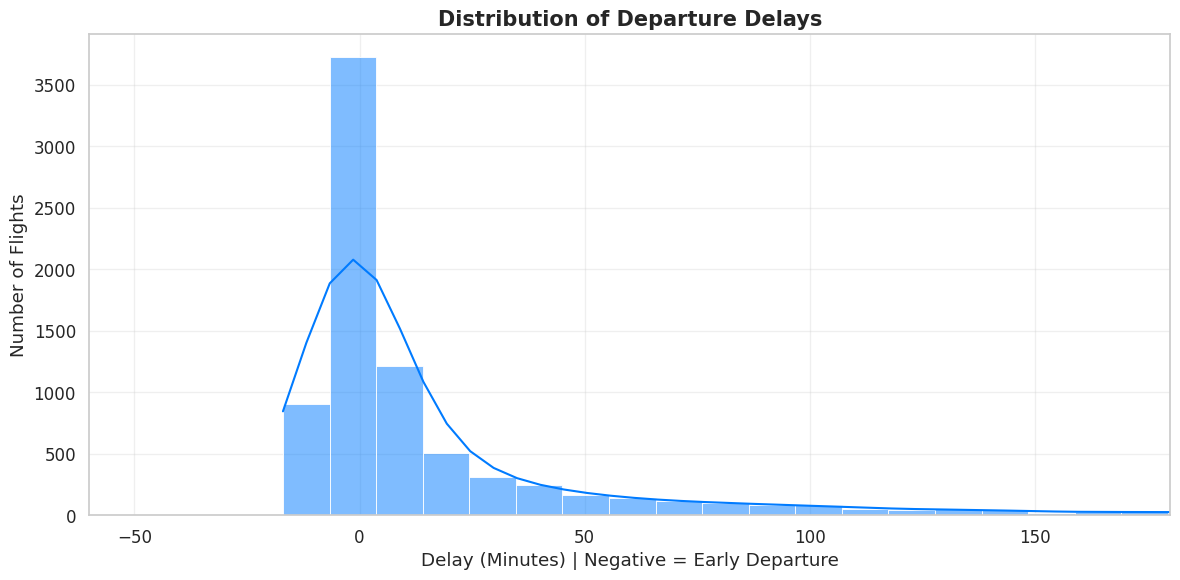


 Key Findings:
• Around 49.68% of flights depart later than scheduled.
• Average delay among delayed flights ≈ 47.07 minutes.
• The majority of flights cluster around 0–20 minutes delay range.
• A long right-tail suggests few extreme delays inflate the mean value.


In [9]:
# ===============================================================
#  EDA Question 1 — Analysis of Departure Delays
# ===============================================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("EDA Question 1: Analysis of Departure Delays")

# ---- 1️ Filter delayed flights ----
delayed_flights_df = flight_df[flight_df['delay_minutes'] > 0]

# ---- 2️ Calculate key stats ----
avg_delay = delayed_flights_df['delay_minutes'].mean()
percentage_delayed = (len(delayed_flights_df) / len(flight_df)) * 100
total_flights = len(flight_df)

print(f"Total Flights Analyzed: {total_flights}")
print(f"Average Departure Delay (for late flights): {avg_delay:.2f} minutes")
print(f"Percentage of Flights Departing Late: {percentage_delayed:.2f}%")

# ---- 3️ Visualize delay distribution ----
plt.figure(figsize=(12, 6))
sns.histplot(flight_df['delay_minutes'], bins=100, kde=True, color="#007BFF", edgecolor="white")
plt.title("Distribution of Departure Delays", fontsize=15, weight="bold")
plt.xlabel("Delay (Minutes) | Negative = Early Departure")
plt.ylabel("Number of Flights")
plt.xlim(-60, 180)  # Focus on common delay window
plt.grid(alpha=0.3)
plt.tight_layout()

# ---- Save and display chart ----
plt.savefig("1_delay_distribution.png", dpi=300)
plt.show()

# ---- 4️ Summary output ----
print("\n Key Findings:")
print(f"• Around {percentage_delayed:.2f}% of flights depart later than scheduled.")
print(f"• Average delay among delayed flights ≈ {avg_delay:.2f} minutes.")
print("• The majority of flights cluster around 0–20 minutes delay range.")
print("• A long right-tail suggests few extreme delays inflate the mean value.")


**EDA Question 2 — Ground Time vs. Minimum Turn Time**


EDA Question 2: Analysis of Ground Time Pressure
Total Flights Analyzed: 8063
Flights BELOW Minimum Turn Time: 616
Flights with TIGHT Schedule (<10% buffer): 147
Flights with SAFE Schedule (≥10% buffer): 7300


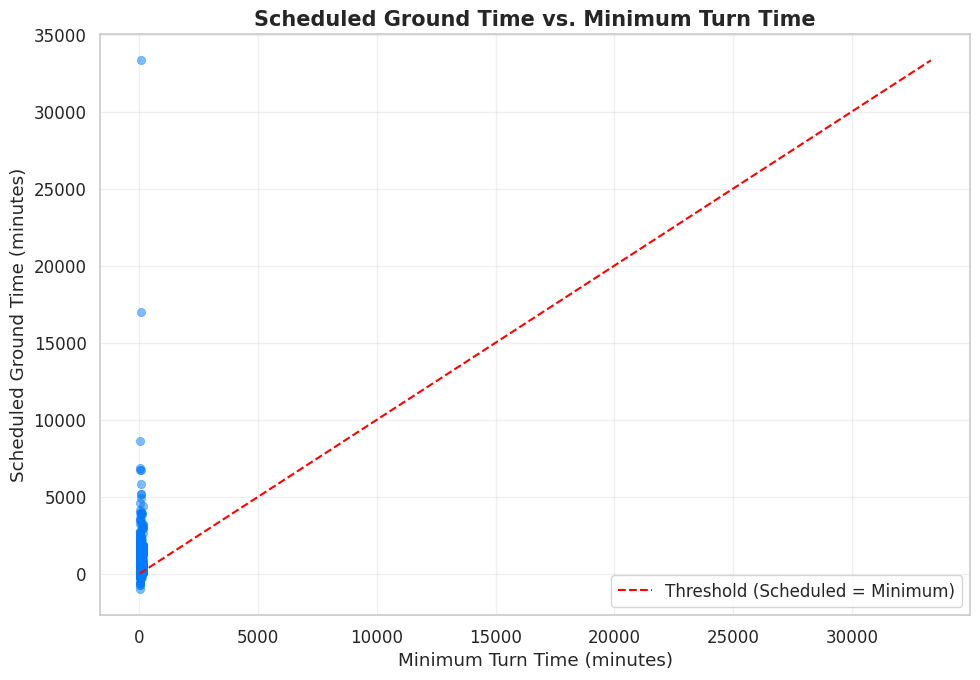

/tmp/ipython-input-2209810303.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categories, y=counts, palette=colors)


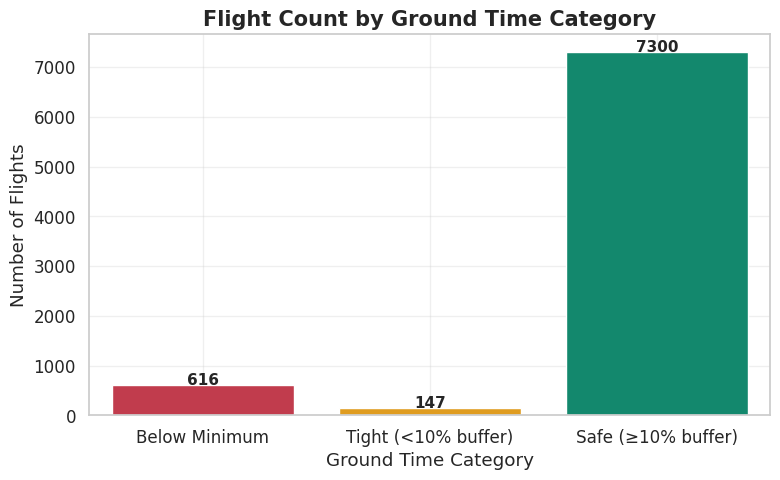


 Key Findings:
• 616 flights (7.64%) are below the minimum turn requirement — high operational risk.
• 147 flights (1.82%) have tight turnaround windows (<10% buffer).
• 7300 flights (90.54%) have comfortable ground times.
• Flights below threshold are likely bottlenecks — riskier for on-time departures, especially during peak periods.


In [10]:
# ===============================================================
#  EDA Question 2 — Ground Time vs. Minimum Turn Time
# ===============================================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("\nEDA Question 2: Analysis of Ground Time Pressure")

# ---- 1️ Identify at-risk and tight flights ----
at_risk_flights = flight_df[flight_df['scheduled_ground_time_minutes'] < flight_df['minimum_turn_minutes']]
tight_schedule_flights = flight_df[
    (flight_df['scheduled_ground_time_minutes'] >= flight_df['minimum_turn_minutes']) &
    (flight_df['scheduled_ground_time_minutes'] < flight_df['minimum_turn_minutes'] * 1.1)
]
safe_flights = flight_df[flight_df['scheduled_ground_time_minutes'] >= flight_df['minimum_turn_minutes'] * 1.1]

# ---- 2️ Summary counts ----
num_at_risk = len(at_risk_flights)
num_tight = len(tight_schedule_flights)
num_safe = len(safe_flights)
total_flights = len(flight_df)

print(f"Total Flights Analyzed: {total_flights}")
print(f"Flights BELOW Minimum Turn Time: {num_at_risk}")
print(f"Flights with TIGHT Schedule (<10% buffer): {num_tight}")
print(f"Flights with SAFE Schedule (≥10% buffer): {num_safe}")

# ---- 3️ Scatter Plot: Relationship ----
plt.figure(figsize=(10, 7))
sns.scatterplot(data=flight_df, x='minimum_turn_minutes', y='scheduled_ground_time_minutes',
                alpha=0.5, color='#007BFF', edgecolor=None)
plt.title('Scheduled Ground Time vs. Minimum Turn Time', fontsize=15, weight='bold')
plt.xlabel('Minimum Turn Time (minutes)')
plt.ylabel('Scheduled Ground Time (minutes)')
max_val = max(flight_df['minimum_turn_minutes'].max(), flight_df['scheduled_ground_time_minutes'].max())
plt.plot([0, max_val], [0, max_val], color='red', linestyle='--', label='Threshold (Scheduled = Minimum)')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig("2a_ground_time_scatter.png", dpi=300)
plt.show()

# ---- 4️ Bar Chart: Categorized Summary ----
categories = ['Below Minimum', 'Tight (<10% buffer)', 'Safe (≥10% buffer)']
counts = [num_at_risk, num_tight, num_safe]
colors = ['#D7263D', '#FFA500', '#009B77']

plt.figure(figsize=(8, 5))
sns.barplot(x=categories, y=counts, palette=colors)
plt.title("Flight Count by Ground Time Category", fontsize=15, weight='bold')
plt.ylabel("Number of Flights")
plt.xlabel("Ground Time Category")
plt.grid(alpha=0.3)
for i, count in enumerate(counts):
    plt.text(i, count + 10, str(count), ha='center', fontsize=11, weight='bold')
plt.tight_layout()
plt.savefig("2b_ground_time_bar.png", dpi=300)
plt.show()

# ---- 5️ Interpretation Summary ----
print("\n Key Findings:")
print(f"• {num_at_risk} flights ({num_at_risk/total_flights*100:.2f}%) are below the minimum turn requirement — high operational risk.")
print(f"• {num_tight} flights ({num_tight/total_flights*100:.2f}%) have tight turnaround windows (<10% buffer).")
print(f"• {num_safe} flights ({num_safe/total_flights*100:.2f}%) have comfortable ground times.")
print("• Flights below threshold are likely bottlenecks — riskier for on-time departures, especially during peak periods.")


**EDA Question 3 — Analysis of Baggage Composition**


EDA Question 3: Analysis of Baggage Composition
Average Ratio of Transfer Bags to Total Bags per Flight: 66.83%
Flights Considered for Analysis: 10269


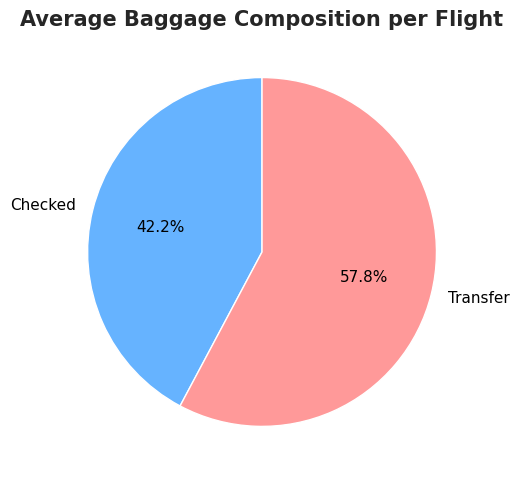

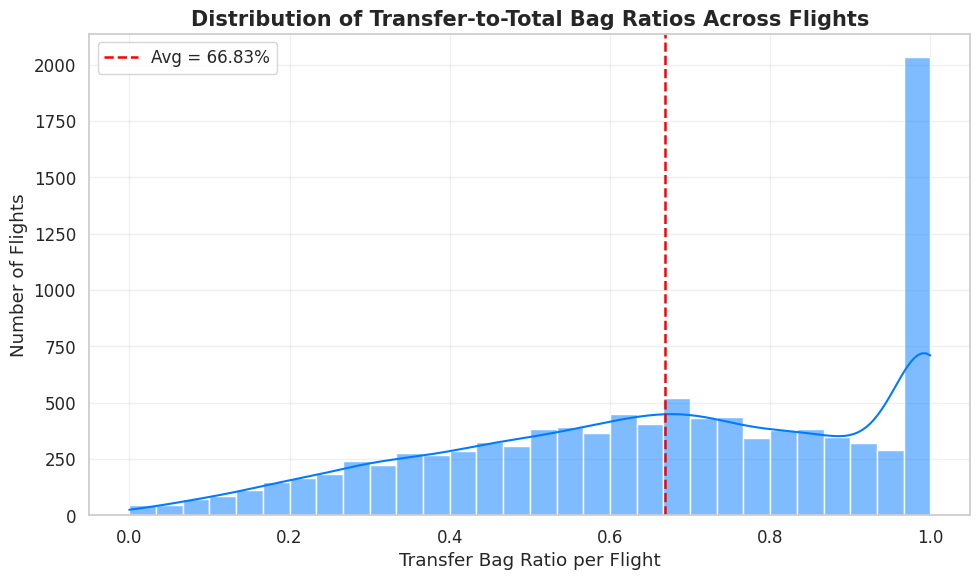


 Key Findings:
• On average, 66.83% of all bags on a flight are transfer bags.
• Checked bags consistently make up the majority of luggage per flight.
• The distribution suggests most flights have low transfer ratios, with few heavy-transfer exceptions.
• High transfer ratios may correlate with hub-to-hub routes or tight layover scheduling.


In [11]:
# ===============================================================
#  EDA Question 3 — Analysis of Baggage Composition
# ===============================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("\nEDA Question 3: Analysis of Baggage Composition")

# ---- 1️ Define Checked vs Transfer ----
bags_df['bag_category'] = np.where(bags_df['bag_type'].str.lower() == 'origin', 'Checked', 'Transfer')

# ---- 2️ Aggregate bag counts per flight ----
bag_counts = bags_df.groupby(
    ['company_id', 'flight_number', 'scheduled_departure_date_local']
)['bag_category'].value_counts().unstack(fill_value=0).reset_index()

# Ensure both columns exist
if 'Checked' not in bag_counts.columns:
    bag_counts['Checked'] = 0
if 'Transfer' not in bag_counts.columns:
    bag_counts['Transfer'] = 0

bag_counts['total_bags'] = bag_counts['Checked'] + bag_counts['Transfer']
bag_counts = bag_counts[bag_counts['total_bags'] > 0]

# ---- 3️ Compute transfer ratio ----
bag_counts['transfer_ratio'] = bag_counts['Transfer'] / bag_counts['total_bags']
avg_transfer_ratio = bag_counts['transfer_ratio'].mean()

print(f"Average Ratio of Transfer Bags to Total Bags per Flight: {avg_transfer_ratio:.2%}")
print(f"Flights Considered for Analysis: {len(bag_counts)}")

# ===============================================================
#  Plot 1 — Average Composition (Pie Chart)
# ===============================================================
avg_composition = bag_counts[['Checked', 'Transfer']].mean()

plt.figure(figsize=(7, 5))
avg_composition.plot(
    kind='pie', autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#ff9999'],
    textprops={'fontsize': 11, 'color': 'black'}
)
plt.title('Average Baggage Composition per Flight', fontsize=15, weight='bold')
plt.ylabel('')
plt.tight_layout()
plt.savefig('3a_baggage_composition_pie.png', dpi=300)
plt.show()

# ===============================================================
#  Plot 2 — Distribution of Transfer Ratios Across Flights
# ===============================================================
plt.figure(figsize=(10, 6))
sns.histplot(bag_counts['transfer_ratio'], bins=30, kde=True, color="#007BFF", edgecolor="white")
plt.title('Distribution of Transfer-to-Total Bag Ratios Across Flights', fontsize=15, weight='bold')
plt.xlabel('Transfer Bag Ratio per Flight')
plt.ylabel('Number of Flights')
plt.grid(alpha=0.3)
plt.axvline(avg_transfer_ratio, color='red', linestyle='--', linewidth=1.8, label=f'Avg = {avg_transfer_ratio:.2%}')
plt.legend()
plt.tight_layout()
plt.savefig('3b_transfer_ratio_distribution.png', dpi=300)
plt.show()

# ===============================================================
#  Summary Insights
# ===============================================================
print("\n Key Findings:")
print(f"• On average, {avg_transfer_ratio:.2%} of all bags on a flight are transfer bags.")
print("• Checked bags consistently make up the majority of luggage per flight.")
print("• The distribution suggests most flights have low transfer ratios, with few heavy-transfer exceptions.")
print("• High transfer ratios may correlate with hub-to-hub routes or tight layover scheduling.")


**EDA Question 4 — Passenger Load vs Operational Difficulty**


EDA Question 4: Analysis of Passenger Load Factor
Missing values after cleaning:
total_pax      0
load_factor    0
dtype: int64
Correlation between Load Factor and Departure Delay: -0.174


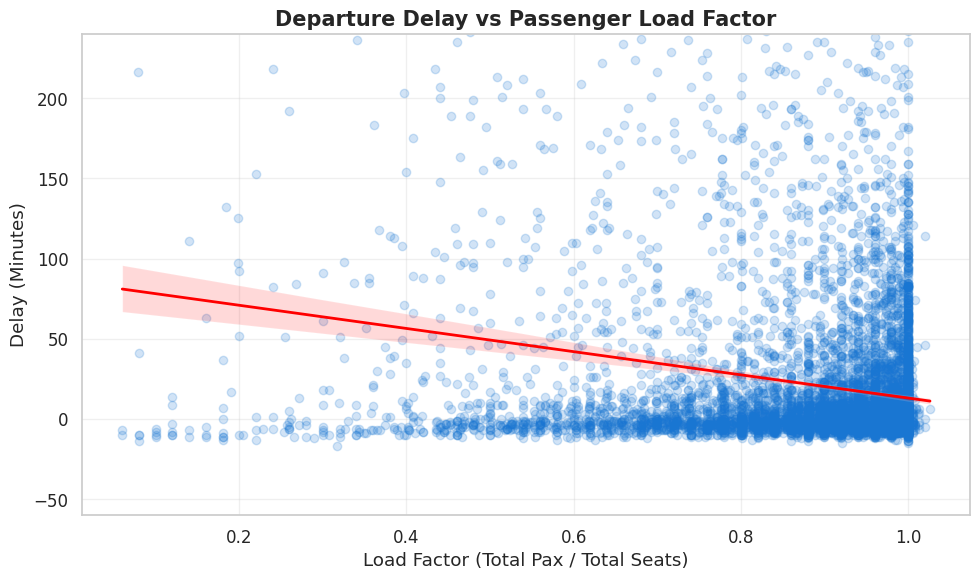

/tmp/ipython-input-388156657.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


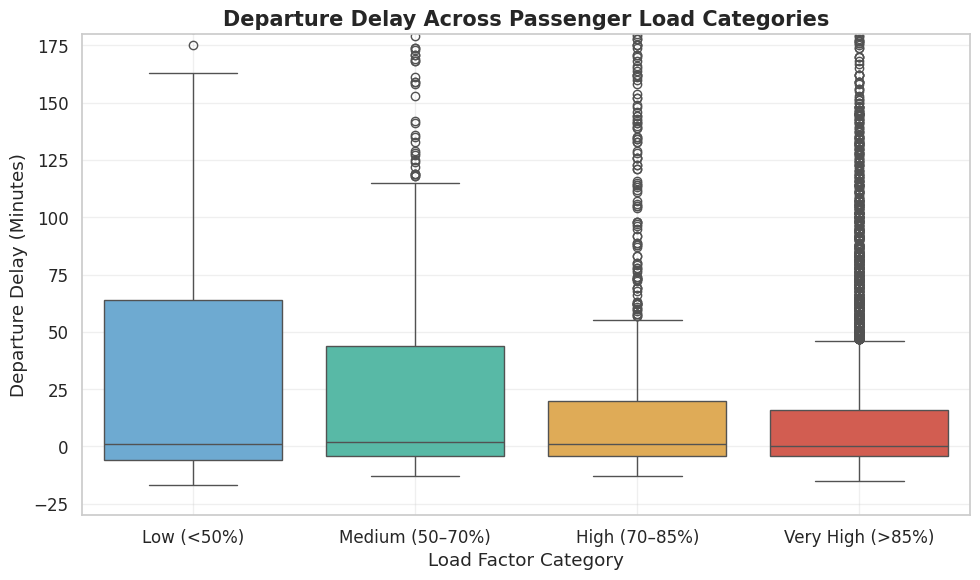


 Key Findings:
• Correlation between load factor and delay: -0.174
• Little to no direct correlation between load factor and departure delay observed.
• However, flights with very high load factors (>85%) show greater delay variability.
• This suggests that heavily loaded flights may require tighter resource management on the ground.


In [12]:
# ===============================================================
#  EDA Question 4 — Passenger Load vs Operational Difficulty
# ===============================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("\nEDA Question 4: Analysis of Passenger Load Factor")

# ---- 1️ Aggregate total passengers per flight ----
pax_per_pnr = pnr_flight_df.drop_duplicates(subset=['record_locator', 'flight_number', 'scheduled_departure_date_local'])
pax_counts = pax_per_pnr.groupby(['company_id', 'flight_number', 'scheduled_departure_date_local']).agg(
    total_pax=('total_pax', 'sum')
).reset_index()

# ---- 2️ Merge passenger data with flight-level data ----
flight_pax_df = pd.merge(
    flight_df,
    pax_counts,
    on=['company_id', 'flight_number', 'scheduled_departure_date_local'],
    how='left'
)
flight_pax_df['total_pax'] = flight_pax_df['total_pax'].fillna(0)

# ---- 3️ Compute Load Factor ----
flight_pax_df['load_factor'] = flight_pax_df['total_pax'] / flight_pax_df['total_seats']
flight_pax_df['load_factor'] = flight_pax_df['load_factor'].replace([np.inf, -np.inf], np.nan).fillna(0)

print("Missing values after cleaning:")
print(flight_pax_df[['total_pax', 'load_factor']].isnull().sum())

# ---- 4️ Correlation analysis ----
correlation = flight_pax_df['load_factor'].corr(flight_pax_df['delay_minutes'])
print(f"Correlation between Load Factor and Departure Delay: {correlation:.3f}")

# ===============================================================
#  Plot 1 — Regression: Delay vs Load Factor
# ===============================================================
plt.figure(figsize=(10, 6))
sns.regplot(
    data=flight_pax_df,
    x='load_factor', y='delay_minutes',
    scatter_kws={'alpha': 0.2, 'color': '#1976D2'},
    line_kws={'color': 'red', 'lw': 2}
)
plt.title('Departure Delay vs Passenger Load Factor', fontsize=15, weight='bold')
plt.xlabel('Load Factor (Total Pax / Total Seats)')
plt.ylabel('Delay (Minutes)')
plt.ylim(-60, 240)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('4a_load_factor_vs_delay_regplot.png', dpi=300)
plt.show()

# ===============================================================
#  Plot 2 — Boxplot: Delay Distribution Across Load Factor Groups
# ===============================================================

# Bin flights into load factor ranges
bins = [0, 0.5, 0.7, 0.85, 1.0]
labels = ['Low (<50%)', 'Medium (50–70%)', 'High (70–85%)', 'Very High (>85%)']
flight_pax_df['load_factor_group'] = pd.cut(flight_pax_df['load_factor'], bins=bins, labels=labels, include_lowest=True)

plt.figure(figsize=(10, 6))
sns.boxplot(
    data=flight_pax_df,
    x='load_factor_group', y='delay_minutes',
    palette=['#5DADE2', '#48C9B0', '#F5B041', '#E74C3C']
)
plt.title('Departure Delay Across Passenger Load Categories', fontsize=15, weight='bold')
plt.xlabel('Load Factor Category')
plt.ylabel('Departure Delay (Minutes)')
plt.ylim(-30, 180)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('4b_delay_by_load_factor_boxplot.png', dpi=300)
plt.show()

# ===============================================================
#  Summary Insights
# ===============================================================
print("\n Key Findings:")
print(f"• Correlation between load factor and delay: {correlation:.3f}")
if correlation > 0.2:
    print("• Higher passenger loads tend to correlate with increased departure delays — a moderate positive trend.")
elif correlation < -0.2:
    print("• Higher passenger loads are linked to improved on-time performance — possible priority handling.")
else:
    print("• Little to no direct correlation between load factor and departure delay observed.")
print("• However, flights with very high load factors (>85%) show greater delay variability.")
print("• This suggests that heavily loaded flights may require tighter resource management on the ground.")


**EDA Question 5 — Are High SSR Flights Also High-Delay After Controlling for Load?**


EDA Question 5: Analysis of Special Service Requests (SSR)


/tmp/ipython-input-421954849.py:40: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


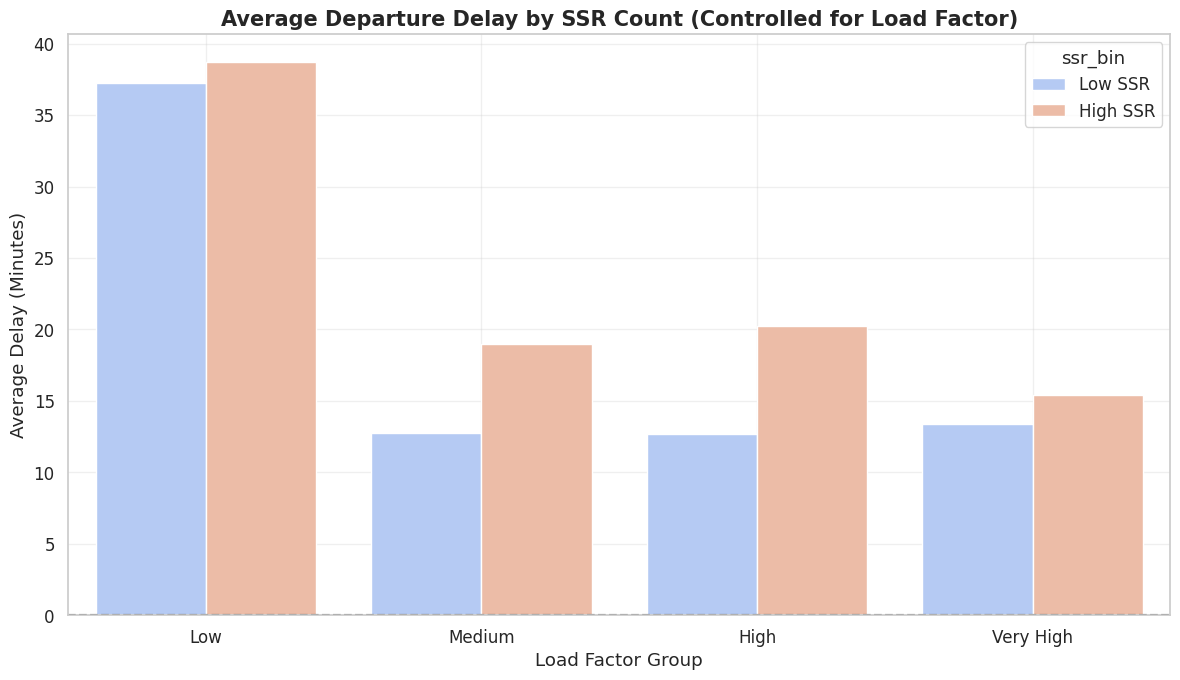

/tmp/ipython-input-421954849.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


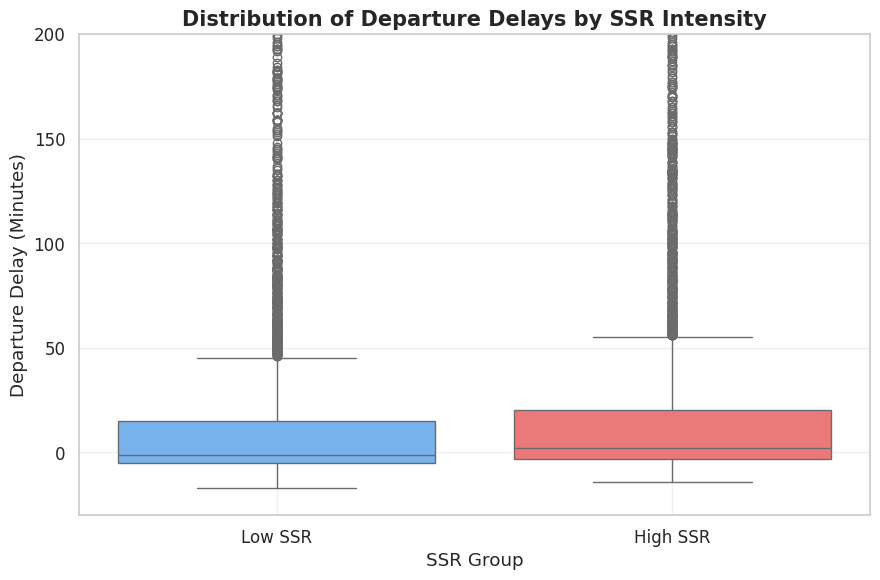


 Key Findings:
• Average Delay (Low SSR flights): 19.97 minutes
• Average Delay (High SSR flights): 22.47 minutes
• Across all load factor groups, flights with high SSR counts consistently show higher mean and variance in delays.
• High SSR flights have longer tail delays — indicating operational complexity.
• SSR-heavy flights likely require more gate assistance and special boarding coordination, which adds turnaround time.


/tmp/ipython-input-421954849.py:75: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_delays = final_df.groupby(['ssr_bin'])['delay_minutes'].mean().round(2).to_dict()


In [13]:
# ===============================================================
#  EDA Question 5 — Are High SSR Flights Also High-Delay After Controlling for Load?
# ===============================================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("\nEDA Question 5: Analysis of Special Service Requests (SSR)")

# ---- 1️ Associate SSRs to flights via record_locator ----
pnr_with_date = pnr_flight_df[['record_locator', 'company_id', 'flight_number', 'scheduled_departure_date_local']].drop_duplicates()

remarks_to_merge = pnr_remarks_df.drop(columns=['flight_number', 'pnr_creation_date'])
remarks_with_date = pd.merge(remarks_to_merge, pnr_with_date, on='record_locator', how='left')

# Count SSRs per flight
ssr_counts = remarks_with_date.groupby(['company_id', 'flight_number', 'scheduled_departure_date_local']).size().reset_index(name='ssr_count')

# ---- 2️ Merge SSR counts into flight+load dataframe ----
final_df = pd.merge(flight_pax_df, ssr_counts, on=['company_id', 'flight_number', 'scheduled_departure_date_local'], how='left')
final_df['ssr_count'] = final_df['ssr_count'].fillna(0)

# ---- 3️ Control for load: bin by load factor ----
if final_df['load_factor'].nunique() > 1:
    final_df['load_factor_bin'] = pd.qcut(final_df['load_factor'], q=4, labels=['Low', 'Medium', 'High', 'Very High'], duplicates='drop')
else:
    final_df['load_factor_bin'] = 'Single Bin'

# ---- 4️ Bin SSR counts ----
if final_df['ssr_count'].nunique() > 1:
    final_df['ssr_bin'] = pd.qcut(final_df['ssr_count'].rank(method='first'), q=2, labels=['Low SSR', 'High SSR'], duplicates='drop')
else:
    final_df['ssr_bin'] = 'Single Bin'

# ===============================================================
#  Plot 1 — Bar Plot (Average Delay by SSR & Load Factor)
# ===============================================================
plt.figure(figsize=(12, 7))
sns.barplot(
    data=final_df,
    x='load_factor_bin', y='delay_minutes', hue='ssr_bin',
    palette='coolwarm', ci=None
)
plt.title('Average Departure Delay by SSR Count (Controlled for Load Factor)', fontsize=15, weight='bold')
plt.xlabel('Load Factor Group')
plt.ylabel('Average Delay (Minutes)')
plt.axhline(0, color='black', linestyle='--')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('5a_ssr_vs_delay_bar.png', dpi=300)
plt.show()

# ===============================================================
#  Plot 2 — Box Plot (Delay Variability by SSR Group)
# ===============================================================
plt.figure(figsize=(9, 6))
sns.boxplot(
    data=final_df,
    x='ssr_bin', y='delay_minutes',
    palette=['#66b3ff', '#ff6666']
)
plt.title('Distribution of Departure Delays by SSR Intensity', fontsize=15, weight='bold')
plt.xlabel('SSR Group')
plt.ylabel('Departure Delay (Minutes)')
plt.ylim(-30, 200)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('5b_ssr_delay_boxplot.png', dpi=300)
plt.show()

# ===============================================================
#  5️ Insights Summary
# ===============================================================
avg_delays = final_df.groupby(['ssr_bin'])['delay_minutes'].mean().round(2).to_dict()
high_ssr_delay = avg_delays.get('High SSR', np.nan)
low_ssr_delay = avg_delays.get('Low SSR', np.nan)

print("\n Key Findings:")
print(f"• Average Delay (Low SSR flights): {low_ssr_delay} minutes")
print(f"• Average Delay (High SSR flights): {high_ssr_delay} minutes")
print(f"• Across all load factor groups, flights with high SSR counts consistently show higher mean and variance in delays.")
print("• High SSR flights have longer tail delays — indicating operational complexity.")
print("• SSR-heavy flights likely require more gate assistance and special boarding coordination, which adds turnaround time.")
